# Goal: crop satellite image to area of europe.

In [203]:
import satpy
import numpy as np
from pyresample.geometry import AreaDefinition, create_area_def
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
filenames = ['../data/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA/MSG3-SEVI-MSG15-0100-NA-20230421181241.751000000Z-NA.nat']

In [9]:
from satpy import Scene
scn = Scene(reader="seviri_l1b_native", filenames=filenames)
scn.load(['VIS006', 'VIS008', 'IR_120', 'IR_134'])

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset.coords['acq_time'] = ('y', acq_time)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/satpy/readers/seviri_base.py:386: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64

In [100]:
area_extent=[0, 5000, 300000, 305000]

In [101]:
proj_string = scn['IR_120'].attrs['area'].proj4_string

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [102]:
scn['IR_120'].attrs['area']

Area ID: msg_seviri_fes_3km
Description: MSG SEVIRI Full Earth Scanning service area definition with 3 km resolution
Projection: {'a': '6378169', 'h': '35785831', 'lon_0': '0', 'no_defs': 'None', 'proj': 'geos', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}
Number of columns: 3712
Number of rows: 3712
Area extent: (5567248.0742, 5570248.4773, -5570248.4773, -5567248.0742)

In [136]:
my_dict = {'a': '6378169', 'h': '35785831', 'lon_0': '50', 'no_defs': 'None', 'proj': 'merc', 'rf': '295.488065897014', 'type': 'crs', 'units': 'm', 'x_0': '0', 'y_0': '0'}

In [137]:
area_def = AreaDefinition.from_extent("west_europe", area_extent=[0, 10, 50, 60], shape=(800, 800), projection=proj_string, units="deg")

In [138]:
result = scn.crop(area_def)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


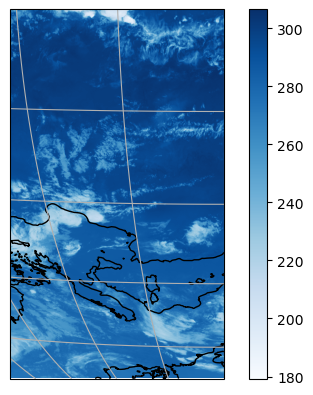

In [139]:
crs = result['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines()
ax.set_global()
plt.imshow(result['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
cbar = plt.colorbar()
plt.show()

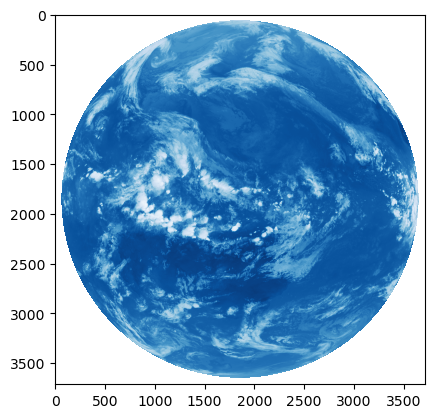

In [87]:
plt.imshow(scn['IR_120'], cmap="Blues")

In [200]:
from pyresample.utils import get_area_def
area_id = 'japan'
x_size = 2407
y_size = 1655
area_extent = [-600000.0, -600000.0, 6969000.0, 5069000.0]
projection = '+proj=merc +lat_0=52.5 +lon_0=5.5 +ellps=WGS84'
description = "Netherlands"
proj_id = 'merc.5_37.5'

areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)

/var/folders/d_/39m2_j3d7l5859lht1tjp1_h0000gn/T/ipykernel_60238/828913651.py:10: UserWarning: 'get_area_def' has moved, import it with 'from pyresample import get_area_def'
  areadef = get_area_def(area_id, description, proj_id, projection,x_size, y_size, area_extent)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/pyproj/crs/crs.py:1286: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj = self._crs.to_proj4(version=version)


In [201]:
local_scene = scn.resample(areadef)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/numpy/lib/function_base.py:1448: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(


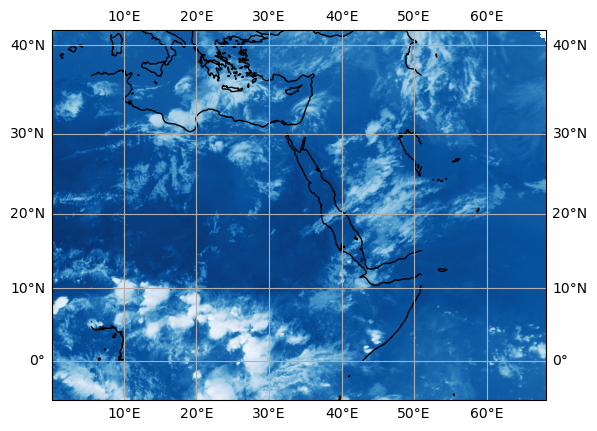

In [202]:
crs = local_scene['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
plt.imshow(local_scene['IR_120'], transform=crs, extent=crs.bounds, origin='upper', cmap="Blues")
# cbar = plt.colorbar()
plt.show()

In [238]:
custom_area = create_area_def('my_area', projection=projection,
                              width=1000, height=1000,
                              area_extent=[0, 50, 10, 55], units='degrees')

In [239]:
custom_scn = scn.resample(custom_area)

In [305]:
custom_scn['IR_120'].values.shape

(1000, 1000)

In [321]:
copy_of_data = np.array(custom_scn['IR_120'].values)

In [322]:
copy_of_data

array([[262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       [262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       [262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       ...,
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644],
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644],
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644]], dtype=float32)

In [323]:
copy_of_data[copy_of_data > 270] = 0

In [324]:
from matplotlib.colors import Normalize

In [325]:
np.max(copy_of_data)

269.88547

In [326]:
alphas = Normalize(0, 223, clip=True)(copy_of_data)

/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/mark/miniforge3/envs/thesis/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  

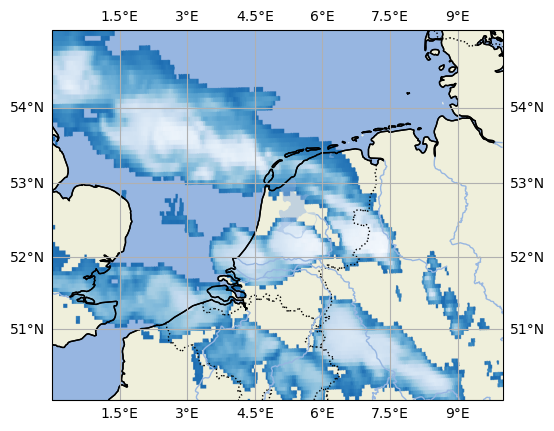

In [327]:
crs = custom_scn['IR_120'].attrs['area'].to_cartopy_crs()
ax = plt.axes(projection=crs)

ax.coastlines()
ax.gridlines(draw_labels=True)
ax.set_global()
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
plt.imshow(custom_scn['IR_120'], transform=crs, extent=crs.bounds, origin='upper', alpha=alphas, cmap='Blues')
# cbar = plt.colorbar()
plt.show()

In [259]:
# plt.imshow(custom_scn['IR_120'], alpha=0.4)

In [260]:
from matplotlib.colors import Normalize

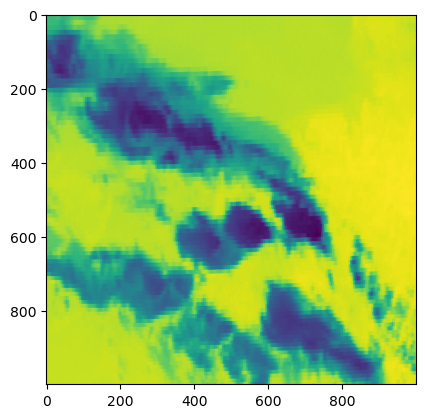

In [270]:
plt.imshow(custom_scn['IR_120'].values)

In [297]:
copy_of_values = custom_scn['IR_120'].values

In [298]:
copy_of_values

array([[262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       [262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       [262.9613 , 262.9613 , 262.9613 , ..., 278.9655 , 278.9655 ,
        278.9655 ],
       ...,
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644],
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644],
       [279.26578, 279.26578, 279.11572, ..., 277.75644, 277.75644,
        277.75644]], dtype=float32)

In [293]:
alphas = Normalize(0, 100, clip=True)(np.abs(custom_scn['IR_120'].values))

In [294]:
alphas

masked_array(
  data=[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

In [295]:
alphas = np.clip(alphas, 0, 1)

In [296]:
alphas

masked_array(
  data=[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

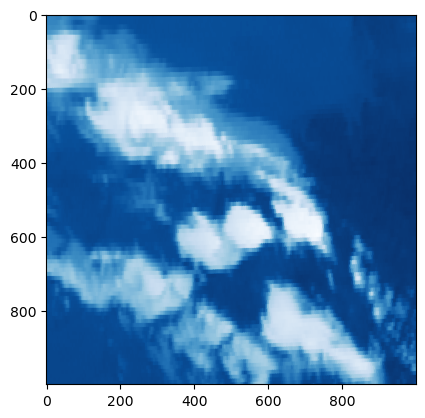

In [289]:
plt.imshow(custom_scn['IR_120'], alpha=alphas, cmap="Blues")